In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df = pd.read_csv('data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
resampled_df = df.resample('M').sum()

In [9]:
model = sm.tsa.SARIMAX(resampled_df['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

C:\Users\AJAY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\AJAY\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


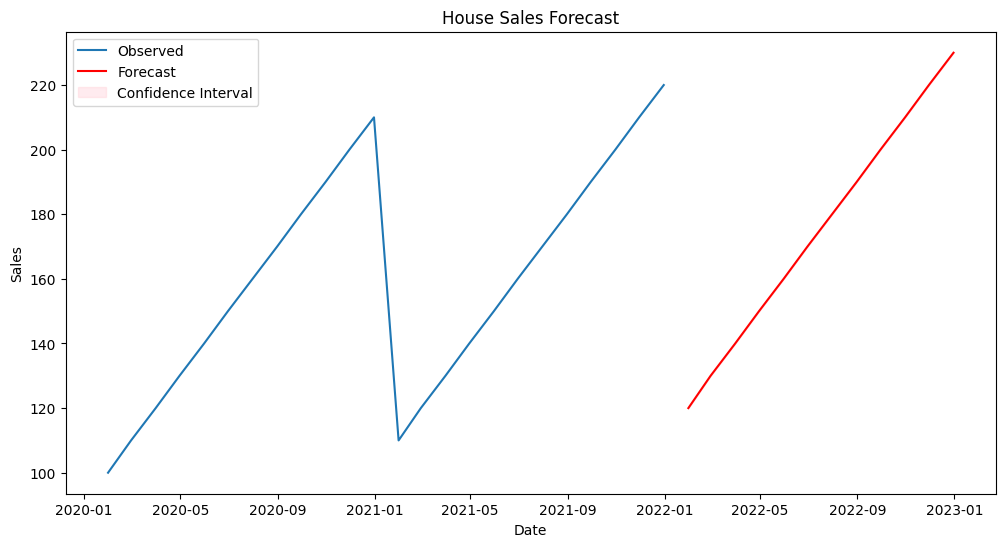

Forecasted Sales:
2022-01-31    120.0
2022-02-28    130.0
2022-03-31    140.0
2022-04-30    150.0
2022-05-31    160.0
2022-06-30    170.0
2022-07-31    180.0
2022-08-31    190.0
2022-09-30    200.0
2022-10-31    210.0
2022-11-30    220.0
2022-12-31    230.0
Freq: M, Name: predicted_mean, dtype: float64


In [8]:
plt.figure(figsize=(12, 6))
plt.plot(resampled_df['Sales'], label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')

plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='Confidence Interval'
)

plt.title('House Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

print("Forecasted Sales:")
print(forecast.predicted_mean)